# Introduction to convnets
![title](./pics/intro-pic.png)

In [1]:
# imports
import numpy as np

# keras imports 
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# utility functions
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

## Instantiating a small convnet

In [2]:
# model architecture developement
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


## Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## Training our convnet on MNIST images

11501568/11490434 [==============================] - 0s 0us/step
input_train shape: (60000, 28, 28, 1)
input_test shape: (10000, 28, 28, 1) 

visualizing mnist data samples..


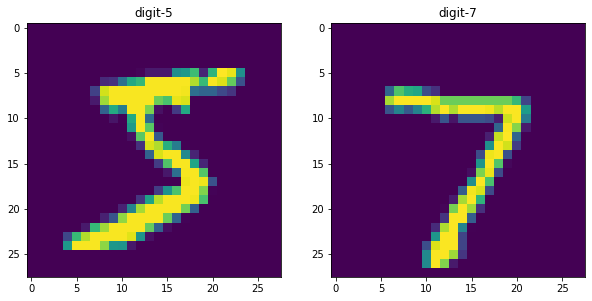


mnist data lables
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Starting model training..

Epoch 1/10
938/938 [==============================] - 11s 6ms/step - loss: 0.1663 - accuracy: 0.9476
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0465 - accuracy: 0.9860
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0319 - accuracy: 0.9901
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0242 - accuracy: 0.9929
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0131 - accuracy: 0.9963
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 9/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0092 - ac

In [4]:
# loading the mnist dataset
(train_images_, train_labels), (test_images_, test_labels) = mnist.load_data()
train_images = train_images_.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images_.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# data understanding
print('input_train shape:', train_images.shape)
print('input_test shape:', test_images.shape, "\n")

print ("visualizing mnist data samples..")
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].set_title('digit-5')
axarr[0].imshow(train_images_[0])
axarr[1].set_title('digit-7')
axarr[1].imshow(test_images_[0])
plt.show()
plt.close()

print ("\nmnist data lables")
print (train_labels[:2])
print ("\nStarting model training..\n")
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)

### result

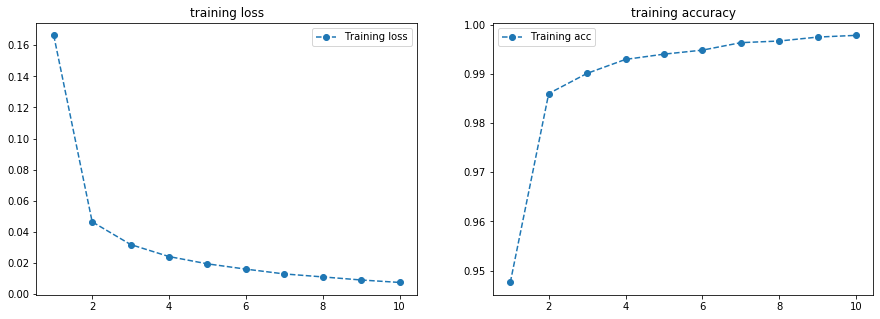

Final accuracy on evaluation data: 99.0%


In [5]:
# ploting model training results
utility_obj.plot_training_history(history.history, plot_val=False)
print ("Final accuracy on evaluation data: {}%".format(round(test_acc,2)*100))